In [1]:
import pandas as pd
import matplotlib.pyplot as plt

vacc_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
vacc_df = pd.read_csv(vacc_url)

In [2]:
owid_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
owid_df = pd.read_csv(owid_url)

In [3]:
vacc_df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


In [4]:
owid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [8]:
population_df = owid_df[['location', 'population']].dropna().drop_duplicates('location', keep='last')
vacc_df = pd.merge(vacc_df, population_df, on='location', how='left')

In [9]:
vacc_df = vacc_df[['location', 'date', 'total_vaccinations', 'people_vaccinated',
                   'people_fully_vaccinated', 'daily_vaccinations', 'population']]
vacc_df['date'] = pd.to_datetime(vacc_df['date'])
vacc_df = vacc_df.dropna(subset=['people_fully_vaccinated', 'population'])

#vaccination rate
vacc_df['vaccination_rate'] = (vacc_df['people_fully_vaccinated'] / vacc_df['population']) * 100


In [10]:
#latest record for each country
latest = vacc_df.sort_values('date').drop_duplicates('location', keep='last')

top5 = latest.sort_values(by='vaccination_rate', ascending=False).head(5)
print("Top 5 Countries by Vaccination Rate:")
print(top5[['location', 'vaccination_rate']])

Top 5 Countries by Vaccination Rate:
                    location  vaccination_rate
69683              Gibraltar        126.893534
176566               Tokelau        116.376123
145844                 Qatar        105.827064
184021  United Arab Emirates        103.719128
142927              Pitcairn        100.000000


First 5 days:
date
2020-12-13         1.0
2020-12-14     14545.0
2020-12-15     80541.0
2020-12-16    406764.0
2020-12-17    561802.0
Name: daily_vaccinations, dtype: float64

Last 5 days:
date
2024-08-10    228.0
2024-08-11     22.0
2024-08-12     24.0
2024-08-13     13.0
2024-08-14     13.0
Name: daily_vaccinations, dtype: float64


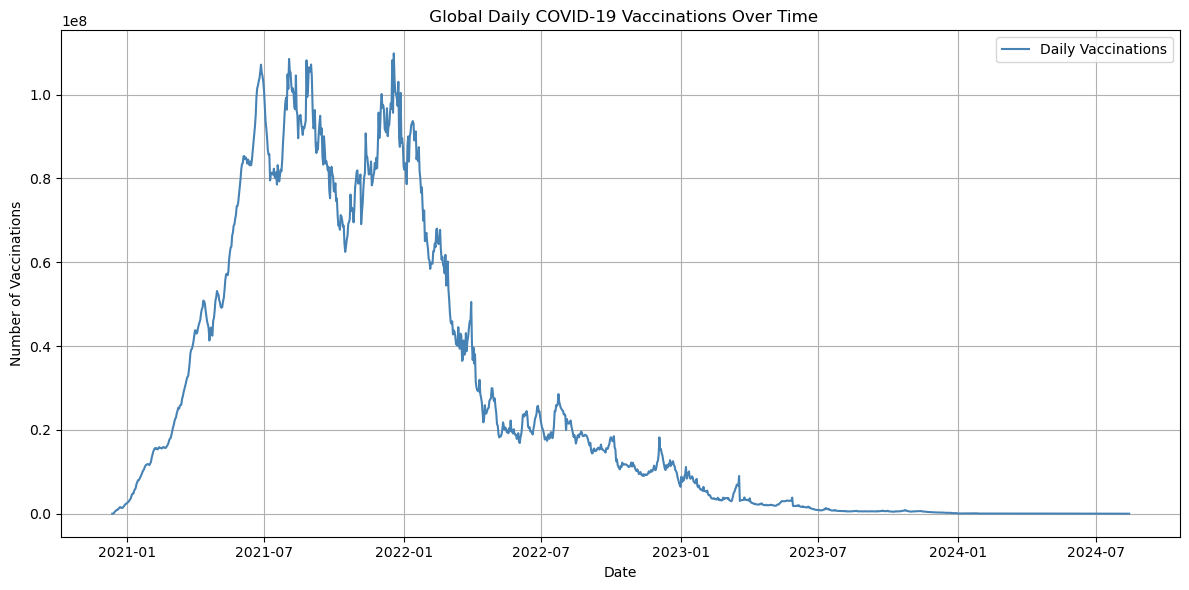

In [15]:
daily_global = vacc_df.groupby('date')['daily_vaccinations'].sum()
print("First 5 days:")
print(daily_global.head())
print("\nLast 5 days:")
print(daily_global.tail())

plt.figure(figsize=(12, 6))
plt.plot(daily_global.index, daily_global.values, label='Daily Vaccinations', color='steelblue')

plt.title(' Global Daily COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

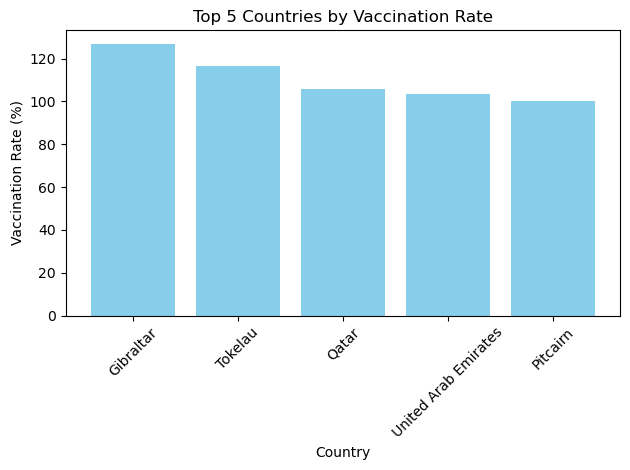

In [12]:
plt.figure()
plt.bar(top5['location'], top5['vaccination_rate'], color='skyblue')
plt.title('Top 5 Countries by Vaccination Rate')
plt.ylabel('Vaccination Rate (%)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


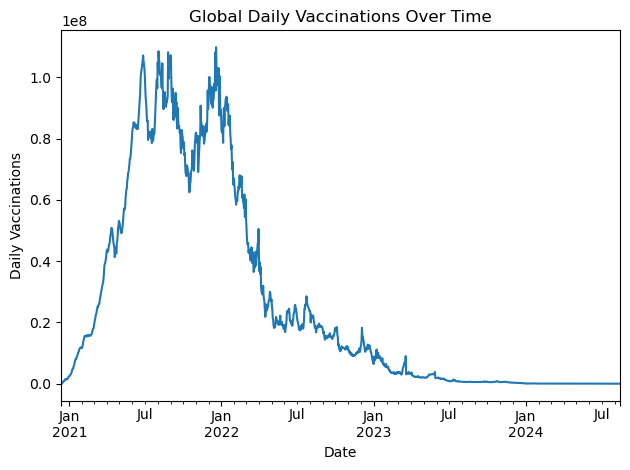

In [13]:
plt.figure()
daily_global.plot()
plt.title('Global Daily Vaccinations Over Time')
plt.ylabel('Daily Vaccinations')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

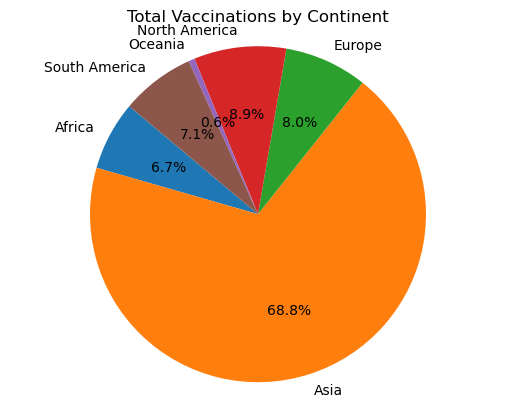

In [14]:
continent_df = owid_df[['location', 'continent']].dropna().drop_duplicates('location', keep='last')
latest_with_continent = pd.merge(latest, continent_df, on='location', how='left')

#agg by continent
continent_summary = latest_with_continent.groupby('continent')['total_vaccinations'].sum().dropna()

plt.figure()
plt.pie(continent_summary, labels=continent_summary.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Vaccinations by Continent')
plt.axis('equal')
plt.show()